In [68]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import cross_val_score

In [69]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

In [70]:
X,y

(array([[ 1.33780765],
        [-0.80924738],
        [ 0.31038993],
        [-1.07322092],
        [ 1.095066  ],
        [-0.31786829],
        [-1.15056133],
        [-0.76265328],
        [ 0.50450074],
        [ 1.30053776],
        [-0.34113091],
        [-0.66209353],
        [ 1.29857577],
        [ 0.07468897],
        [-0.94127335],
        [ 0.25021251],
        [ 1.05147001],
        [ 1.13541246],
        [ 0.0027558 ],
        [-1.29292126],
        [-0.84624346],
        [ 0.82532715],
        [ 1.99220667],
        [-1.87940664],
        [ 0.04652199],
        [ 0.61906731],
        [ 0.93976577],
        [ 0.04701571],
        [ 1.40222933],
        [ 0.62991382],
        [ 0.12797957],
        [-1.06532116],
        [ 0.00703101],
        [-0.17381987],
        [ 2.20987642],
        [-1.95331817],
        [-0.46852568],
        [-0.07423466],
        [ 0.40812891],
        [ 0.09315442],
        [ 0.35550712],
        [ 0.99899257],
        [ 0.59973585],
        [-1

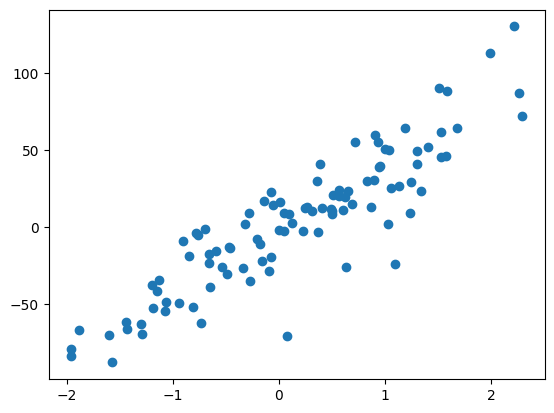

In [71]:
plot.scatter(X,y)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[39.39215306]
-2.6928503468500975


In [93]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

420.3952487193534
0.7534191562017561


In [75]:
cross_val_score = np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

In [76]:
cross_val_score

0.7036353593694242

In [85]:
class GDRegresser:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        #  calculate the b using gd
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() -self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() -self.b)*X.ravel())
            self.b = self.b -(self.lr *loss_slope_b)
            self.m = self.m -(self.lr *loss_slope_m)
        
        print(self.b, self.m)
    
    def predict(self, X):
        return self.m*X.ravel() + self.b





In [86]:
gd = GDRegresser(0.001,40)


In [87]:
gd.fit(X,y)
gd.predict(X)

-2.7433932751622314 39.43703304109997


array([ 50.01577134, -34.65770875,   9.49746449, -45.06804235,
        40.44276068, -15.27917567, -48.1181183 , -32.82017604,
        17.15261907,  48.54595752, -16.19658427, -28.85439781,
        48.46858223,   0.20211818, -39.86442137,   7.12424559,
        38.72346437,  42.0339053 ,  -2.6347126 , -53.73237168,
       -36.11672464,  29.80506086,  75.82332718, -76.86161517,
        -0.90870403,  21.67078471,  34.31818048,  -0.88923336,
        52.55637102,  22.09853872,   2.30374113, -44.75649907,
        -2.46611097,  -9.59833324,  84.40757615, -79.77646643,
       -21.22065598,  -5.67098791,  13.35199988,   0.9303405 ,
        11.27675285,  36.65390962,  20.90840922, -49.97730298,
       -49.57559736,  25.57360709, -64.86554819,  59.37628016,
       -47.33728623,  34.77265418, -33.44751611,  63.55959817,
       -23.98934882,   7.61164097,  46.33102828,  19.69917284,
       -20.71753166, -28.62801083, -21.86822391, -59.60396391,
        56.69221434,  -9.03092616, -10.89976379,  34.03

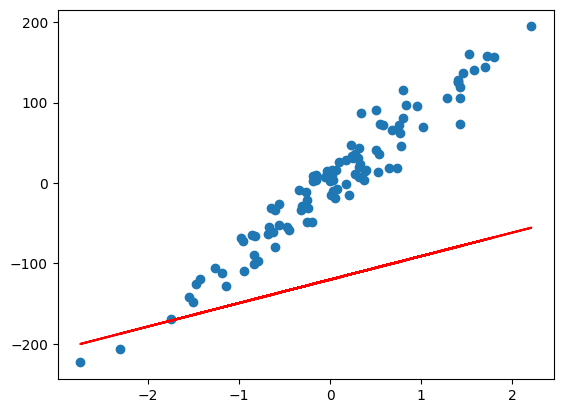

In [38]:
# plot
plot.scatter(X,y)
plot.plot(X, gd.m*X.ravel() + gd.b, c='r')


In [94]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

420.3952487193534
0.7534191562017561


In [95]:
y_pred = gd.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

420.4917719610626
0.753362540951086
